In [1]:
from google.colab import files
uploaded = files.upload()

Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv


----- Classification Evaluation -----
Accuracy: 0.92
Precision: 0.93
Recall: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       249
           1       0.93      0.91      0.92       230

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



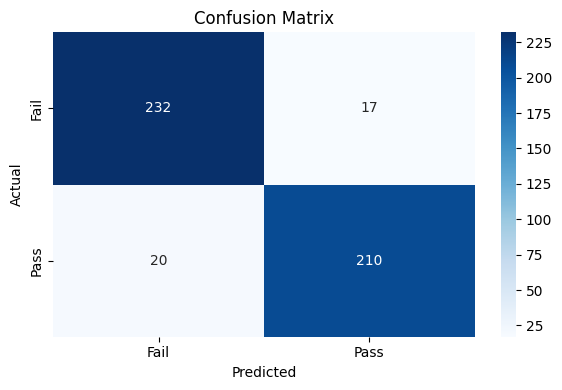

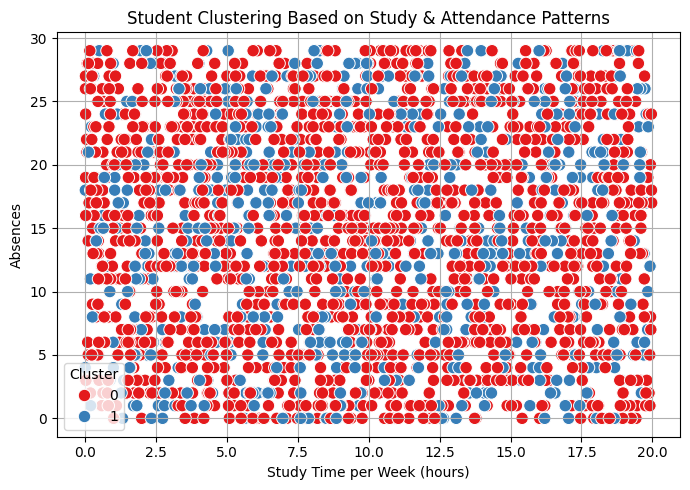


----- Sample Clustered Data -----
   StudyTimeWeekly  Absences       GPA  Result  Cluster
0        19.833723         7  2.929196       1        1
1        15.408756         0  3.042915       1        0
2         4.210570        26  0.112602       0        0
3        10.028829        14  2.054218       1        0
4         4.672495        17  1.288061       0        1


In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ----------------------- Load Dataset -----------------------
# Read the CSV file
df = pd.read_csv("8. Student Performance Prediction.csv")

# Create a new column 'Result':
# 1 if GPA >= 2.0 (Pass), otherwise 0 (Fail)
df['Result'] = df['GPA'].apply(lambda x: 1 if x >= 2.0 else 0)

# ----------------------- Classification -----------------------

# Select features for prediction
features = ['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport']
X = df[features]        # Input features
y = df['Result']        # Target variable (Pass/Fail)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict results for test set
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)           # Accuracy
prec = precision_score(y_test, y_pred)         # Precision
rec = recall_score(y_test, y_pred)             # Recall
report = classification_report(y_test, y_pred) # Detailed report
cm = confusion_matrix(y_test, y_pred)          # Confusion matrix

# Print performance metrics
print("----- Classification Evaluation -----")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print("\nClassification Report:\n", report)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ----------------------- Clustering -----------------------

# Standardize the input features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering (2 clusters: Low performers & High performers)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters based on Study Time and Absences
plt.figure(figsize=(7, 5))
sns.scatterplot(x='StudyTimeWeekly', y='Absences', hue='Cluster', data=df, palette='Set1', s=80)
plt.title("Student Clustering Based on Study & Attendance Patterns")
plt.xlabel("Study Time per Week (hours)")
plt.ylabel("Absences")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Show first few rows with clustering result
print("\n----- Sample Clustered Data -----")
print(df[['StudyTimeWeekly', 'Absences', 'GPA', 'Result', 'Cluster']].head())
